# Model training

## Load data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Input, Model


In [2]:
outdir = "out_p_a1_given_q_xeff"
# import data
data = pd.read_pickle(f"{outdir}/p_a1_given_q_xeff.pkl")

In [3]:
data

,q,xeff,a1,p_a1
0,0.0,-1.0,"[0.0, 0.002004008016032064, 0.0040080160320641...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
1,0.0,-0.8,"[0.0, 0.002004008016032064, 0.0040080160320641...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
2,0.0,-0.6,"[0.0, 0.002004008016032064, 0.0040080160320641...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
3,0.0,-0.4,"[0.0, 0.002004008016032064, 0.0040080160320641...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
4,0.0,-0.2,"[0.0, 0.002004008016032064, 0.0040080160320641...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
...,...,...,...,...
116,1.0,0.2,"[0.0, 0.002004008016032064, 0.0040080160320641...","[1.0680033419862862, 1.0678605941877117, 1.067..."
117,1.0,0.4,"[0.0, 0.002004008016032064, 0.0040080160320641...","[0.7832345001188603, 0.7843442342552497, 0.784..."
118,1.0,0.6,"[0.2064128256513026, 0.2080031807101176, 0.209...","[0.0003581317510958827, 0.0006423405154926148,..."
119,1.0,0.8,"[0.6112224448897795, 0.6120015582266737, 0.612...","[0.003378646421929789, 0.004692188317429458, 0..."


## Pre-processing

### Some data contains nans, drop them so that they wont cause problems later

In [4]:
data.drop([0,1,2,3,4,5,6,7,8,9,10,11,21,22,32,33,43,44,54,55,65,66,76,77,87,88,98,99,109,110,120], inplace=True)

In [5]:
data.reset_index(drop=True, inplace=True)

Stupid way of getting everything to a numpy array with dtyoe = float64

In [6]:
a1 = []
for i in range(len(data)):
    a1.append(data['a1'][i])
a1 = np.array(a1)
p = []
for i in range(len(data)):
    p.append(data['p_a1'][i])
p = np.array(p)
q = data['q'].values
xeff = data['xeff'].values

In [7]:
# from sklearn.preprocessing import normalize
# p_norm = normalize(p,axis=0)

### Spliting data into train and test

In [8]:
# split into train and test
from sklearn.model_selection import train_test_split
train_q, test_q, train_xeff, test_xeff, train_p, test_p, train_a1, test_a1 \
= train_test_split(q, xeff, p, a1,
 test_size=0.2, random_state=42)

### Pair q and xeff

In [9]:
train_q_xeff = np.stack((train_q, train_xeff), axis=1)

## Define model

In [10]:
# define model which take input of q, xeff, and a and output p
# input 2 numbers and 1 array, output 1 array with 500 elements
Input1 = keras.Input(shape=(2,)) # q, xeff
Input2 = keras.Input(shape=(500,)) # a1
merged = keras.layers.concatenate([Input1, Input2]) # Merging Laryer
# x = keras.layers.Dense(1024, activation='relu')(merged)
# x = keras.layers.Dropout(0.1)(x)
# x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(300, activation='relu')(merged) # Fully Connected Layer
x = keras.layers.Dropout(0.1)(x)
x = keras.layers.BatchNormalization()(x)
output = keras.layers.Dense(500, activation='relu')(x) # Fully Connected Layer

model = Model(inputs=[Input1,Input2], outputs=output)

In [11]:
opt = keras.optimizers.SGD(learning_rate = 0.1)
model.compile(optimizer= opt,
                loss=tf.keras.losses.MeanSquaredError(),
                metrics= ['accuracy'])

history = model.fit([train_q_xeff,train_a1], train_p, validation_split=0.2,
                    epochs=500, batch_size=16, shuffle=True, verbose=2)

Epoch 1/500
4/4 - 1s - loss: 5.1025 - accuracy: 0.0000e+00 - val_loss: 2.4699 - val_accuracy: 0.0000e+00 - 835ms/epoch - 209ms/step
Epoch 2/500
4/4 - 0s - loss: 4.8464 - accuracy: 0.0175 - val_loss: 2.3587 - val_accuracy: 0.0000e+00 - 22ms/epoch - 6ms/step
Epoch 3/500
4/4 - 0s - loss: 4.5829 - accuracy: 0.0000e+00 - val_loss: 2.3378 - val_accuracy: 0.0000e+00 - 24ms/epoch - 6ms/step
Epoch 4/500
4/4 - 0s - loss: 4.3294 - accuracy: 0.0175 - val_loss: 2.1280 - val_accuracy: 0.0000e+00 - 26ms/epoch - 6ms/step
Epoch 5/500
4/4 - 0s - loss: 3.9095 - accuracy: 0.0526 - val_loss: 2.1614 - val_accuracy: 0.0000e+00 - 26ms/epoch - 6ms/step
Epoch 6/500
4/4 - 0s - loss: 3.5540 - accuracy: 0.0000e+00 - val_loss: 2.0956 - val_accuracy: 0.0000e+00 - 25ms/epoch - 6ms/step
Epoch 7/500
4/4 - 0s - loss: 3.3655 - accuracy: 0.0351 - val_loss: 2.3250 - val_accuracy: 0.0000e+00 - 26ms/epoch - 7ms/step
Epoch 8/500
4/4 - 0s - loss: 3.0471 - accuracy: 0.0175 - val_loss: 2.1680 - val_accuracy: 0.0000e+00 - 23ms/ep

In [23]:
def eva_model(model):
    # evaluate the model
    scores = model.evaluate([test_q_xeff, test_a1], test_p)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    # plot history
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    #
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(['train', 'val'], loc='upper left')
    plt.xlabel('epoches')
    plt.ylabel('loss')
    plt.title('model loss')
    plt.show()
    #
    test_p_pred = model.predict([test_q_xeff, test_a1])
    plt.plot(test_a1[3],test_p_pred[3],label = 'pred',color = 'red')
    plt.plot(test_a1[3],test_p[3],label = 'true',color = 'blue')
    plt.title(f'prediction vs true p_a1 for q = {test_q[3]}, xeff = {test_xeff[3]}')
    plt.legend()
    plt.xlabel('a1')
    plt.ylabel('p')
    plt.show()

In [61]:
def eva_noval_model(model):
    # evaluate the model
    scores = model.evaluate([test_q_xeff, test_a1], test_p)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    # plot history
    plt.plot(history.history['accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.show()
    #
    plt.plot(history.history['loss'])
    plt.xlabel('epoches')
    plt.ylabel('loss')
    plt.title('model loss')
    plt.show()
    #
    test_p_pred = model.predict([test_q_xeff, test_a1])
    plt.plot(test_a1[3],test_p_pred[3],label = 'pred',color = 'red')
    plt.plot(test_a1[3],test_p[3],label = 'true',color = 'blue')
    plt.title(f'prediction vs true p_a1 for q = {test_q[3]}, xeff = {test_xeff[3]}')
    plt.legend()
    plt.xlabel('a1')
    plt.ylabel('p')
    plt.show()

1/1 [==============================] - 0s 28ms/step - loss: 1.0886 - accuracy: 0.0000e+00
accuracy: 0.00%


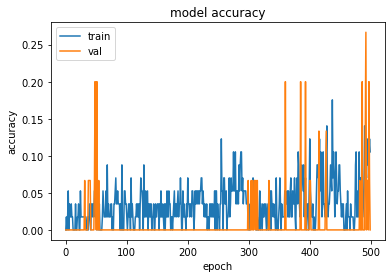

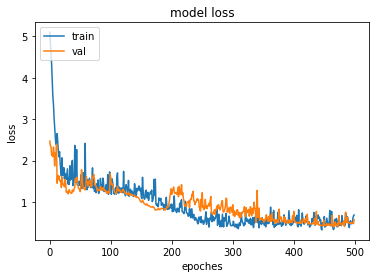

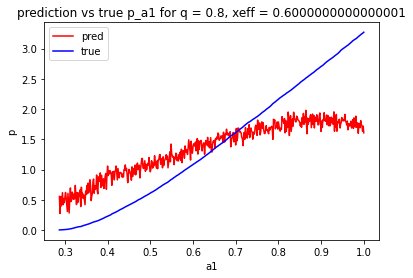

In [24]:
eva_model(model)

In [38]:
# define model which take input of q, xeff, and a and output p
# input 2 numbers and 1 array, output 1 array with 500 elements
Input1 = keras.Input(shape=(2,)) # q, xeff
Input2 = keras.Input(shape=(500,)) # a1
merged = keras.layers.concatenate([Input1, Input2]) # Merging Laryer
# x = keras.layers.Dense(1024, activation='relu')(merged)
# x = keras.layers.Dropout(0.1)(x)
# x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(512, activation='relu',
 kernel_regularizer= keras.regularizers.L2(0.01))(merged) # Fully Connected Layer
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.BatchNormalization()(x)
output = keras.layers.Dense(500, activation='relu')(x) # Fully Connected Layer

model = Model(inputs=[Input1,Input2], outputs=output)

In [39]:
opt = keras.optimizers.Adam(learning_rate = 1e-6)
model.compile(optimizer= opt,
                loss='mse',
                metrics= ['accuracy'])

history = model.fit([train_q_xeff,train_a1], train_p, validation_split=0.2,
                    epochs=500, batch_size=8, shuffle=True, verbose=2)

Epoch 1/500
8/8 - 1s - loss: 10.2002 - accuracy: 0.0000e+00 - val_loss: 7.6255 - val_accuracy: 0.0000e+00 - 729ms/epoch - 91ms/step
Epoch 2/500
8/8 - 0s - loss: 10.2137 - accuracy: 0.0000e+00 - val_loss: 7.6399 - val_accuracy: 0.0000e+00 - 31ms/epoch - 4ms/step
Epoch 3/500
8/8 - 0s - loss: 10.2644 - accuracy: 0.0000e+00 - val_loss: 7.6550 - val_accuracy: 0.0000e+00 - 39ms/epoch - 5ms/step
Epoch 4/500
8/8 - 0s - loss: 10.2175 - accuracy: 0.0000e+00 - val_loss: 7.6687 - val_accuracy: 0.0000e+00 - 35ms/epoch - 4ms/step
Epoch 5/500
8/8 - 0s - loss: 10.2114 - accuracy: 0.0000e+00 - val_loss: 7.6811 - val_accuracy: 0.0000e+00 - 35ms/epoch - 4ms/step
Epoch 6/500
8/8 - 0s - loss: 10.1989 - accuracy: 0.0000e+00 - val_loss: 7.6942 - val_accuracy: 0.0000e+00 - 54ms/epoch - 7ms/step
Epoch 7/500
8/8 - 0s - loss: 10.1863 - accuracy: 0.0175 - val_loss: 7.7066 - val_accuracy: 0.0000e+00 - 38ms/epoch - 5ms/step
Epoch 8/500
8/8 - 0s - loss: 10.2262 - accuracy: 0.0000e+00 - val_loss: 7.7199 - val_accurac

1/1 [==============================] - 0s 23ms/step - loss: 0.6580 - accuracy: 0.0000e+00
accuracy: 0.00%


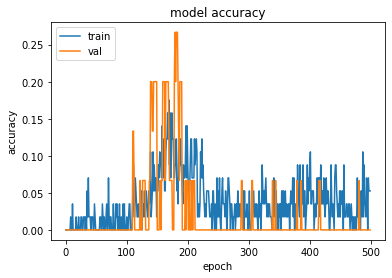

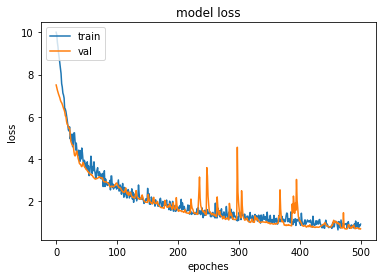

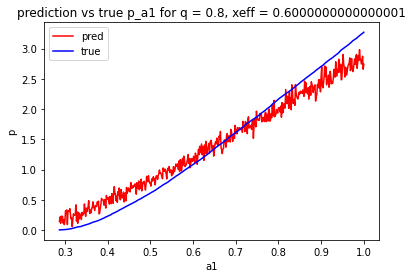

In [37]:
eva_model(model)

In [40]:
# define model which take input of q, xeff, and a and output p
# input 2 numbers and 1 array, output 1 array with 500 elements
Input1 = keras.Input(shape=(2,)) # q, xeff
Input2 = keras.Input(shape=(500,)) # a1
merged = keras.layers.concatenate([Input1, Input2]) # Merging Laryer
# x = keras.layers.Dense(1024, activation='relu')(merged)
# x = keras.layers.Dropout(0.1)(x)
# x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(512, activation='relu',
 kernel_regularizer= keras.regularizers.L2(0.01))(merged) # Fully Connected Layer
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.BatchNormalization()(x)
output = keras.layers.Dense(500, activation='relu')(x) # Fully Connected Layer

model = Model(inputs=[Input1,Input2], outputs=output)

opt = keras.optimizers.Adam(learning_rate = 1e-3)
model.compile(optimizer= opt,
                loss='mse',
                metrics= ['accuracy'])

history = model.fit([train_q_xeff,train_a1], train_p, validation_split=0.2,
                    epochs=500, batch_size=8, shuffle=True, verbose=2)

Epoch 1/500
8/8 - 1s - loss: 9.5170 - accuracy: 0.0000e+00 - val_loss: 6.1007 - val_accuracy: 0.0000e+00 - 588ms/epoch - 74ms/step
Epoch 2/500
8/8 - 0s - loss: 7.5289 - accuracy: 0.0000e+00 - val_loss: 4.9633 - val_accuracy: 0.0000e+00 - 32ms/epoch - 4ms/step
Epoch 3/500
8/8 - 0s - loss: 5.6623 - accuracy: 0.0000e+00 - val_loss: 4.1658 - val_accuracy: 0.0000e+00 - 35ms/epoch - 4ms/step
Epoch 4/500
8/8 - 0s - loss: 4.3712 - accuracy: 0.0000e+00 - val_loss: 3.2899 - val_accuracy: 0.0000e+00 - 35ms/epoch - 4ms/step
Epoch 5/500
8/8 - 0s - loss: 3.9265 - accuracy: 0.0351 - val_loss: 2.9411 - val_accuracy: 0.0000e+00 - 36ms/epoch - 4ms/step
Epoch 6/500
8/8 - 0s - loss: 3.6782 - accuracy: 0.0000e+00 - val_loss: 2.6628 - val_accuracy: 0.0000e+00 - 36ms/epoch - 4ms/step
Epoch 7/500
8/8 - 0s - loss: 3.3271 - accuracy: 0.0000e+00 - val_loss: 2.4906 - val_accuracy: 0.0000e+00 - 38ms/epoch - 5ms/step
Epoch 8/500
8/8 - 0s - loss: 3.2760 - accuracy: 0.0000e+00 - val_loss: 2.5276 - val_accuracy: 0.066

1/1 [==============================] - 0s 20ms/step - loss: 0.7014 - accuracy: 0.0000e+00
accuracy: 0.00%


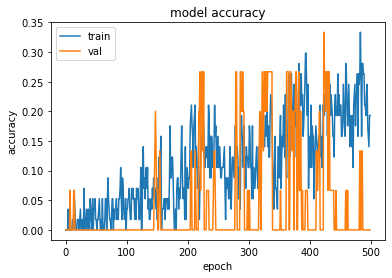

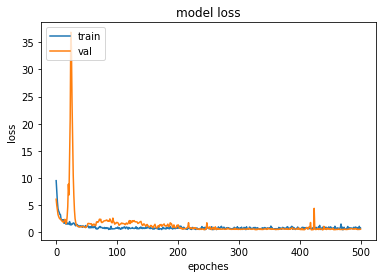

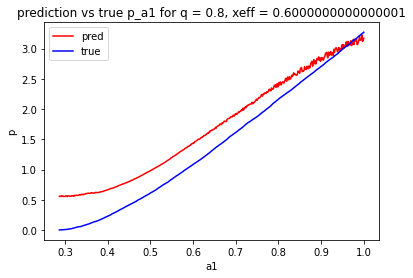

In [41]:
eva_model(model)

In [42]:
# define model which take input of q, xeff, and a and output p
# input 2 numbers and 1 array, output 1 array with 500 elements
Input1 = keras.Input(shape=(2,)) # q, xeff
Input2 = keras.Input(shape=(500,)) # a1
merged = keras.layers.concatenate([Input1, Input2]) # Merging Laryer
# x = keras.layers.Dense(1024, activation='relu')(merged)
# x = keras.layers.Dropout(0.1)(x)
# x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(50, activation='relu',
 kernel_regularizer= keras.regularizers.L1(0.01))(merged) # Fully Connected Layer
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.BatchNormalization()(x)
output = keras.layers.Dense(500, activation='relu')(x) # Fully Connected Layer

model = Model(inputs=[Input1,Input2], outputs=output)

opt = keras.optimizers.Adam(learning_rate = 1e-3)
model.compile(optimizer= opt,
                loss='mse',
                metrics= ['accuracy'])

history = model.fit([train_q_xeff,train_a1], train_p, validation_split=0.2,
                    epochs=500, batch_size=8, shuffle=True, verbose=2)

Epoch 1/500
8/8 - 1s - loss: 17.9308 - accuracy: 0.0000e+00 - val_loss: 13.9960 - val_accuracy: 0.0000e+00 - 598ms/epoch - 75ms/step
Epoch 2/500
8/8 - 0s - loss: 16.0925 - accuracy: 0.0000e+00 - val_loss: 12.3223 - val_accuracy: 0.0000e+00 - 28ms/epoch - 4ms/step
Epoch 3/500
8/8 - 0s - loss: 14.3727 - accuracy: 0.0000e+00 - val_loss: 10.8516 - val_accuracy: 0.0000e+00 - 29ms/epoch - 4ms/step
Epoch 4/500
8/8 - 0s - loss: 12.8010 - accuracy: 0.0000e+00 - val_loss: 9.6041 - val_accuracy: 0.0000e+00 - 32ms/epoch - 4ms/step
Epoch 5/500
8/8 - 0s - loss: 11.3574 - accuracy: 0.0000e+00 - val_loss: 8.4880 - val_accuracy: 0.0000e+00 - 29ms/epoch - 4ms/step
Epoch 6/500
8/8 - 0s - loss: 10.1594 - accuracy: 0.0000e+00 - val_loss: 7.4068 - val_accuracy: 0.0000e+00 - 29ms/epoch - 4ms/step
Epoch 7/500
8/8 - 0s - loss: 8.9415 - accuracy: 0.0000e+00 - val_loss: 6.6719 - val_accuracy: 0.0000e+00 - 30ms/epoch - 4ms/step
Epoch 8/500
8/8 - 0s - loss: 8.0143 - accuracy: 0.0000e+00 - val_loss: 6.1191 - val_ac

1/1 [==============================] - 0s 20ms/step - loss: 1.3173 - accuracy: 0.4444
accuracy: 44.44%


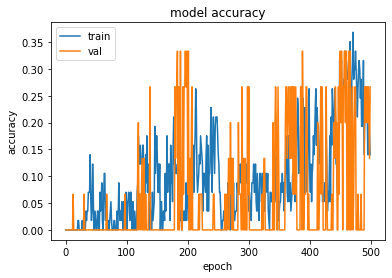

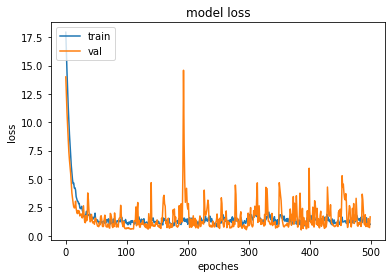

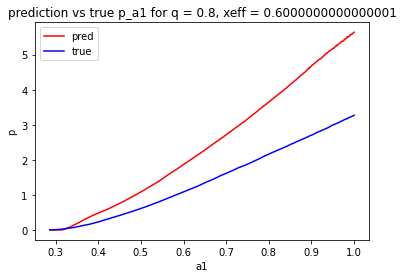

In [43]:
eva_model(model)

In [51]:
# define model which take input of q, xeff, and a and output p
# input 2 numbers and 1 array, output 1 array with 500 elements
Input1 = keras.Input(shape=(2,)) # q, xeff
Input2 = keras.Input(shape=(500,)) # a1
merged = keras.layers.concatenate([Input1, Input2]) # Merging Laryer
# x = keras.layers.Dense(1024, activation='relu')(merged)
# x = keras.layers.Dropout(0.1)(x)
# x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(60, activation='relu',
 kernel_regularizer= keras.regularizers.L1(0.01))(merged) # Fully Connected Layer
x = keras.layers.Dropout(0.2)(x)
# x = keras.layers.BatchNormalization()(x)
output = keras.layers.Dense(500, activation='relu')(x) # Fully Connected Layer

model = Model(inputs=[Input1,Input2], outputs=output)

opt = keras.optimizers.Adam(learning_rate = 3e-3)
model.compile(optimizer= opt,
                loss='mse',
                metrics= ['accuracy'])

history = model.fit([train_q_xeff,train_a1], train_p, validation_split=0.2,
                    epochs=500, batch_size=8, shuffle=True, verbose=2)

Epoch 1/500
8/8 - 1s - loss: 18.5448 - accuracy: 0.0000e+00 - val_loss: 12.3713 - val_accuracy: 0.0000e+00 - 508ms/epoch - 64ms/step
Epoch 2/500
8/8 - 0s - loss: 13.1147 - accuracy: 0.0000e+00 - val_loss: 8.4009 - val_accuracy: 0.0000e+00 - 26ms/epoch - 3ms/step
Epoch 3/500
8/8 - 0s - loss: 9.4990 - accuracy: 0.0000e+00 - val_loss: 5.6574 - val_accuracy: 0.0000e+00 - 29ms/epoch - 4ms/step
Epoch 4/500
8/8 - 0s - loss: 7.1899 - accuracy: 0.0000e+00 - val_loss: 4.5778 - val_accuracy: 0.0000e+00 - 31ms/epoch - 4ms/step
Epoch 5/500
8/8 - 0s - loss: 5.5228 - accuracy: 0.0000e+00 - val_loss: 4.0922 - val_accuracy: 0.0000e+00 - 29ms/epoch - 4ms/step
Epoch 6/500
8/8 - 0s - loss: 4.8210 - accuracy: 0.0000e+00 - val_loss: 3.8306 - val_accuracy: 0.0000e+00 - 30ms/epoch - 4ms/step
Epoch 7/500
8/8 - 0s - loss: 3.9451 - accuracy: 0.0175 - val_loss: 3.8435 - val_accuracy: 0.0000e+00 - 35ms/epoch - 4ms/step
Epoch 8/500
8/8 - 0s - loss: 4.0169 - accuracy: 0.0351 - val_loss: 5.5492 - val_accuracy: 0.0000

1/1 [==============================] - 0s 18ms/step - loss: 2.5350 - accuracy: 0.4444
accuracy: 44.44%


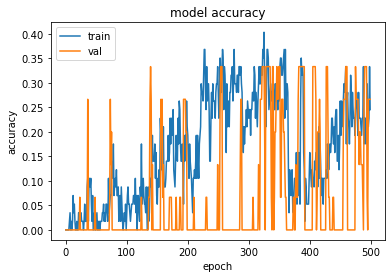

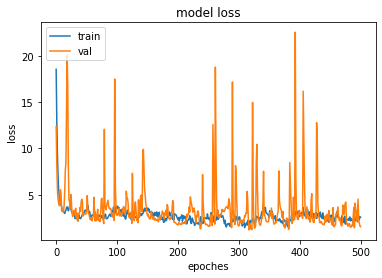

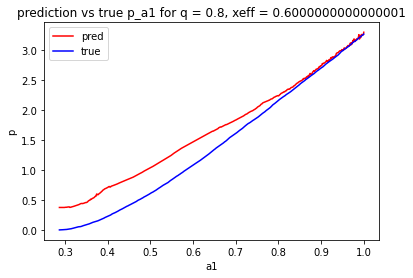

In [52]:
eva_model(model)

In [60]:
# define model which take input of q, xeff, and a and output p
# input 2 numbers and 1 array, output 1 array with 500 elements
Input1 = keras.Input(shape=(2,)) # q, xeff
Input2 = keras.Input(shape=(500,)) # a1
merged = keras.layers.concatenate([Input1, Input2]) # Merging Laryer
# x = keras.layers.Dense(1024, activation='relu')(merged)
# x = keras.layers.Dropout(0.1)(x)
# x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(70, activation='relu',
 kernel_regularizer= keras.regularizers.L1(0.01))(merged) # Fully Connected Layer
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.BatchNormalization()(x)
output = keras.layers.Dense(500, activation='relu')(x) # Fully Connected Layer

model = Model(inputs=[Input1,Input2], outputs=output)

opt = keras.optimizers.Adam(learning_rate = 3e-3)
model.compile(optimizer= opt,
                loss='mse',
                metrics= ['accuracy'])

history = model.fit([train_q_xeff,train_a1], train_p,
                    epochs=500, batch_size=16, shuffle=True, verbose=2)

Epoch 1/500
5/5 - 0s - loss: 21.0356 - accuracy: 0.0139 - 446ms/epoch - 89ms/step
Epoch 2/500
5/5 - 0s - loss: 16.5643 - accuracy: 0.0000e+00 - 7ms/epoch - 1ms/step
Epoch 3/500
5/5 - 0s - loss: 12.9808 - accuracy: 0.0000e+00 - 7ms/epoch - 1ms/step
Epoch 4/500
5/5 - 0s - loss: 10.0593 - accuracy: 0.0000e+00 - 9ms/epoch - 2ms/step
Epoch 5/500
5/5 - 0s - loss: 8.1227 - accuracy: 0.0000e+00 - 8ms/epoch - 2ms/step
Epoch 6/500
5/5 - 0s - loss: 6.6223 - accuracy: 0.0000e+00 - 9ms/epoch - 2ms/step
Epoch 7/500
5/5 - 0s - loss: 5.6285 - accuracy: 0.0000e+00 - 9ms/epoch - 2ms/step
Epoch 8/500
5/5 - 0s - loss: 4.9280 - accuracy: 0.0000e+00 - 10ms/epoch - 2ms/step
Epoch 9/500
5/5 - 0s - loss: 4.3924 - accuracy: 0.0000e+00 - 11ms/epoch - 2ms/step
Epoch 10/500
5/5 - 0s - loss: 3.8708 - accuracy: 0.0000e+00 - 8ms/epoch - 2ms/step
Epoch 11/500
5/5 - 0s - loss: 3.5317 - accuracy: 0.0139 - 11ms/epoch - 2ms/step
Epoch 12/500
5/5 - 0s - loss: 3.6296 - accuracy: 0.0000e+00 - 12ms/epoch - 2ms/step
Epoch 13/5

1/1 [==============================] - 0s 99ms/step - loss: 2.8960 - accuracy: 0.0000e+00
accuracy: 0.00%


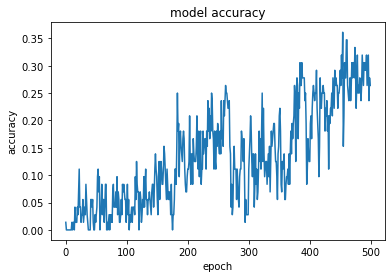

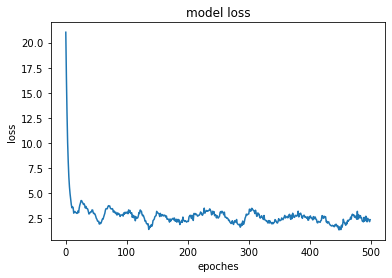

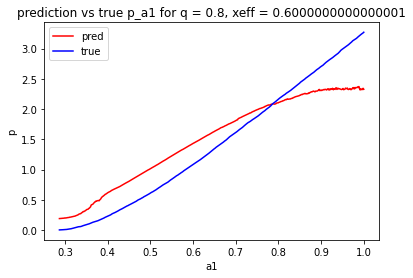

In [62]:
eva_noval_model(model)

In [63]:
# define model which take input of q, xeff, and a and output p
# input 2 numbers and 1 array, output 1 array with 500 elements
Input1 = keras.Input(shape=(2,)) # q, xeff
Input2 = keras.Input(shape=(500,)) # a1
merged = keras.layers.concatenate([Input1, Input2]) # Merging Laryer
# x = keras.layers.Dense(1024, activation='relu')(merged)
# x = keras.layers.Dropout(0.1)(x)
# x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(50, activation='relu',
 kernel_regularizer= keras.regularizers.L1(0.01))(merged) # Fully Connected Layer
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.BatchNormalization()(x)
output = keras.layers.Dense(500, activation='relu')(x) # Fully Connected Layer

model = Model(inputs=[Input1,Input2], outputs=output)

opt = keras.optimizers.Adam(learning_rate = 5e-2)
model.compile(optimizer= opt,
                loss='mse',
                metrics= ['accuracy'])

history = model.fit([train_q_xeff,train_a1], train_p,
                    epochs=500, batch_size=16, shuffle=True, verbose=2)

Epoch 1/500
5/5 - 0s - loss: 13.1004 - accuracy: 0.0000e+00 - 462ms/epoch - 92ms/step
Epoch 2/500
5/5 - 0s - loss: 11.5177 - accuracy: 0.0000e+00 - 6ms/epoch - 1ms/step
Epoch 3/500
5/5 - 0s - loss: 10.6781 - accuracy: 0.0278 - 7ms/epoch - 1ms/step
Epoch 4/500
5/5 - 0s - loss: 12.6967 - accuracy: 0.0000e+00 - 9ms/epoch - 2ms/step
Epoch 5/500
5/5 - 0s - loss: 14.5076 - accuracy: 0.0278 - 8ms/epoch - 2ms/step
Epoch 6/500
5/5 - 0s - loss: 14.9252 - accuracy: 0.0000e+00 - 8ms/epoch - 2ms/step
Epoch 7/500
5/5 - 0s - loss: 15.2298 - accuracy: 0.0000e+00 - 10ms/epoch - 2ms/step
Epoch 8/500
5/5 - 0s - loss: 15.8764 - accuracy: 0.0000e+00 - 8ms/epoch - 2ms/step
Epoch 9/500
5/5 - 0s - loss: 16.1328 - accuracy: 0.0000e+00 - 8ms/epoch - 2ms/step
Epoch 10/500
5/5 - 0s - loss: 15.9685 - accuracy: 0.0278 - 11ms/epoch - 2ms/step
Epoch 11/500
5/5 - 0s - loss: 17.3405 - accuracy: 0.0000e+00 - 9ms/epoch - 2ms/step
Epoch 12/500
5/5 - 0s - loss: 18.6925 - accuracy: 0.0139 - 8ms/epoch - 2ms/step
Epoch 13/500

1/1 [==============================] - 0s 93ms/step - loss: 15.2632 - accuracy: 0.3889
accuracy: 38.89%


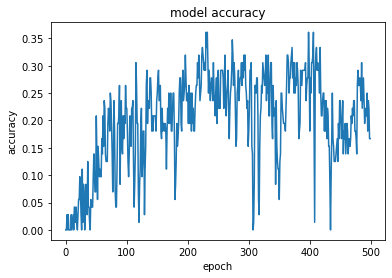

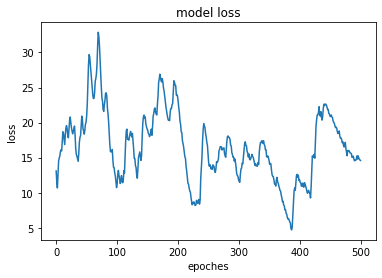

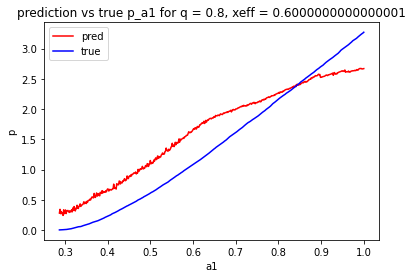

In [64]:
eva_noval_model(model)

In [67]:
# define model which take input of q, xeff, and a and output p
# input 2 numbers and 1 array, output 1 array with 500 elements
Input1 = keras.Input(shape=(2,)) # q, xeff
Input2 = keras.Input(shape=(500,)) # a1
merged = keras.layers.concatenate([Input1, Input2]) # Merging Laryer
# x = keras.layers.Dense(1024, activation='relu')(merged)
# x = keras.layers.Dropout(0.1)(x)
# x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(40, activation='relu',
 kernel_regularizer= keras.regularizers.L1(0.01))(merged) # Fully Connected Layer
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.BatchNormalization()(x)
output = keras.layers.Dense(500, activation='relu')(x) # Fully Connected Layer

model = Model(inputs=[Input1,Input2], outputs=output)

opt = keras.optimizers.Adam(learning_rate = 5e-2)
model.compile(optimizer= opt,
                loss='mse',
                metrics= ['accuracy'])

history = model.fit([train_q_xeff,train_a1], train_p,
                    epochs=500, batch_size=16, shuffle=True, verbose=2)

Epoch 1/500
5/5 - 0s - loss: 11.2904 - accuracy: 0.0000e+00 - 414ms/epoch - 83ms/step
Epoch 2/500
5/5 - 0s - loss: 10.3936 - accuracy: 0.0000e+00 - 7ms/epoch - 1ms/step
Epoch 3/500
5/5 - 0s - loss: 11.9103 - accuracy: 0.0278 - 7ms/epoch - 1ms/step
Epoch 4/500
5/5 - 0s - loss: 12.8597 - accuracy: 0.0556 - 10ms/epoch - 2ms/step
Epoch 5/500
5/5 - 0s - loss: 12.4373 - accuracy: 0.1111 - 9ms/epoch - 2ms/step
Epoch 6/500
5/5 - 0s - loss: 11.7956 - accuracy: 0.0833 - 10ms/epoch - 2ms/step
Epoch 7/500
5/5 - 0s - loss: 11.2738 - accuracy: 0.0139 - 11ms/epoch - 2ms/step
Epoch 8/500
5/5 - 0s - loss: 10.5349 - accuracy: 0.0139 - 13ms/epoch - 3ms/step
Epoch 9/500
5/5 - 0s - loss: 11.9101 - accuracy: 0.0694 - 9ms/epoch - 2ms/step
Epoch 10/500
5/5 - 0s - loss: 11.7819 - accuracy: 0.0694 - 8ms/epoch - 2ms/step
Epoch 11/500
5/5 - 0s - loss: 11.1693 - accuracy: 0.0278 - 17ms/epoch - 3ms/step
Epoch 12/500
5/5 - 0s - loss: 10.5693 - accuracy: 0.0139 - 21ms/epoch - 4ms/step
Epoch 13/500
5/5 - 0s - loss: 10

1/1 [==============================] - 0s 93ms/step - loss: 8.6124 - accuracy: 0.2222
accuracy: 22.22%


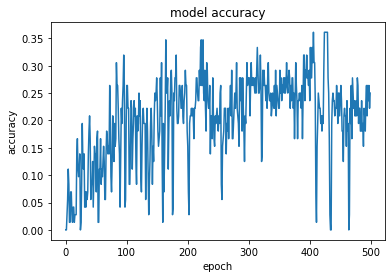

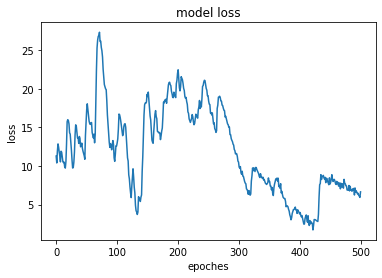

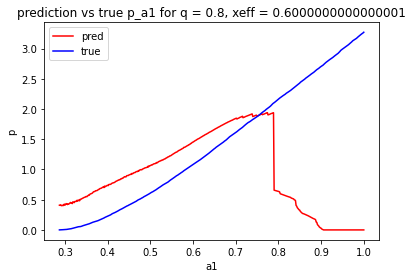

In [68]:
eva_noval_model(model)

In [69]:
# define model which take input of q, xeff, and a and output p
# input 2 numbers and 1 array, output 1 array with 500 elements
Input1 = keras.Input(shape=(2,)) # q, xeff
Input2 = keras.Input(shape=(500,)) # a1
merged = keras.layers.concatenate([Input1, Input2]) # Merging Laryer
x = keras.layers.Dense(60, activation='relu',
 kernel_regularizer= keras.regularizers.L1(0.01))(merged) # Fully Connected Layer
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.BatchNormalization()(x)
output = keras.layers.Dense(500, activation='relu')(x) # Fully Connected Layer

model = Model(inputs=[Input1,Input2], outputs=output)
opt = keras.optimizers.Adam(learning_rate = 3e-3)
model.compile(optimizer= opt,
                loss='mse',
                metrics= ['accuracy'])
history = model.fit([train_q_xeff,train_a1], train_p, validation_split=0.2,
                    epochs=500, batch_size=8, shuffle=True, verbose=2)

Epoch 1/500
8/8 - 1s - loss: 18.5462 - accuracy: 0.0000e+00 - val_loss: 12.2648 - val_accuracy: 0.0000e+00 - 632ms/epoch - 79ms/step
Epoch 2/500
8/8 - 0s - loss: 13.0394 - accuracy: 0.0000e+00 - val_loss: 8.1193 - val_accuracy: 0.0000e+00 - 27ms/epoch - 3ms/step
Epoch 3/500
8/8 - 0s - loss: 9.3744 - accuracy: 0.0000e+00 - val_loss: 5.2854 - val_accuracy: 0.0000e+00 - 32ms/epoch - 4ms/step
Epoch 4/500
8/8 - 0s - loss: 7.0058 - accuracy: 0.0000e+00 - val_loss: 3.8459 - val_accuracy: 0.0000e+00 - 38ms/epoch - 5ms/step
Epoch 5/500
8/8 - 0s - loss: 5.7453 - accuracy: 0.0000e+00 - val_loss: 3.4768 - val_accuracy: 0.0000e+00 - 34ms/epoch - 4ms/step
Epoch 6/500
8/8 - 0s - loss: 4.9777 - accuracy: 0.0000e+00 - val_loss: 3.4535 - val_accuracy: 0.0000e+00 - 31ms/epoch - 4ms/step
Epoch 7/500
8/8 - 0s - loss: 4.3499 - accuracy: 0.0000e+00 - val_loss: 2.8760 - val_accuracy: 0.0000e+00 - 30ms/epoch - 4ms/step
Epoch 8/500
8/8 - 0s - loss: 3.4404 - accuracy: 0.0351 - val_loss: 3.1100 - val_accuracy: 0.

1/1 [==============================] - 0s 22ms/step - loss: 2.5358 - accuracy: 0.5000
accuracy: 50.00%


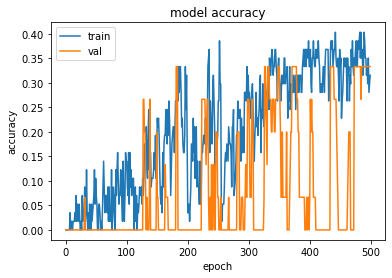

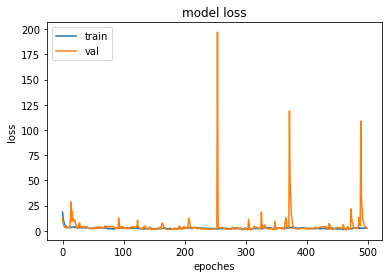

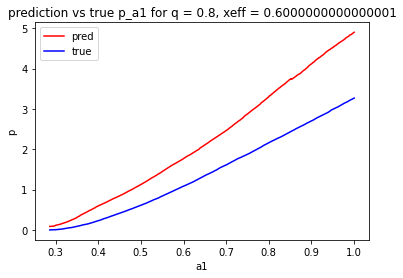

In [71]:
eva_model(model)

In [72]:
# define model which take input of q, xeff, and a and output p
# input 2 numbers and 1 array, output 1 array with 500 elements
Input1 = keras.Input(shape=(2,)) # q, xeff
Input2 = keras.Input(shape=(500,)) # a1
merged = keras.layers.concatenate([Input1, Input2]) # Merging Laryer
x = keras.layers.Dense(60, activation='relu',
 kernel_regularizer= keras.regularizers.L1(0.01))(merged) # Fully Connected Layer
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.BatchNormalization()(x)
output = keras.layers.Dense(500, activation='relu')(x) # Fully Connected Layer

model = Model(inputs=[Input1,Input2], outputs=output)
opt = keras.optimizers.Adam(learning_rate = 3e-3)
model.compile(optimizer= opt,
                loss='mse',
                metrics= ['accuracy'])
history = model.fit([train_q_xeff,train_a1], train_p, validation_split=0.2,
                    epochs=500, batch_size=16, shuffle=True, verbose=2)

Epoch 1/500
4/4 - 1s - loss: 19.9035 - accuracy: 0.0000e+00 - val_loss: 14.9549 - val_accuracy: 0.0000e+00 - 510ms/epoch - 127ms/step
Epoch 2/500
4/4 - 0s - loss: 16.6812 - accuracy: 0.0000e+00 - val_loss: 12.0645 - val_accuracy: 0.0000e+00 - 21ms/epoch - 5ms/step
Epoch 3/500
4/4 - 0s - loss: 13.9305 - accuracy: 0.0000e+00 - val_loss: 9.7521 - val_accuracy: 0.0000e+00 - 22ms/epoch - 5ms/step
Epoch 4/500
4/4 - 0s - loss: 11.4341 - accuracy: 0.0000e+00 - val_loss: 8.0771 - val_accuracy: 0.0000e+00 - 26ms/epoch - 7ms/step
Epoch 5/500
4/4 - 0s - loss: 9.5144 - accuracy: 0.0000e+00 - val_loss: 6.6558 - val_accuracy: 0.0000e+00 - 26ms/epoch - 6ms/step
Epoch 6/500
4/4 - 0s - loss: 8.0379 - accuracy: 0.0175 - val_loss: 5.4862 - val_accuracy: 0.0000e+00 - 24ms/epoch - 6ms/step
Epoch 7/500
4/4 - 0s - loss: 6.6791 - accuracy: 0.0000e+00 - val_loss: 4.8349 - val_accuracy: 0.0000e+00 - 25ms/epoch - 6ms/step
Epoch 8/500
4/4 - 0s - loss: 6.1439 - accuracy: 0.0000e+00 - val_loss: 4.1970 - val_accuracy

1/1 [==============================] - 0s 16ms/step - loss: 2.2279 - accuracy: 0.3333
accuracy: 33.33%


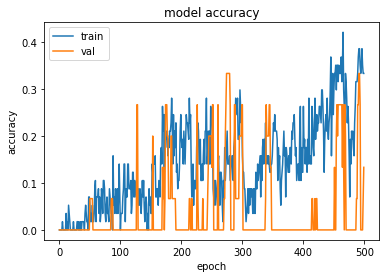

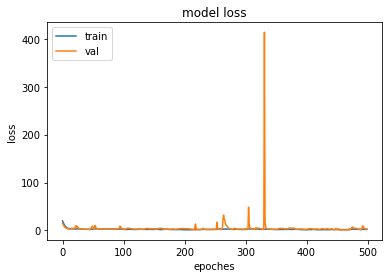

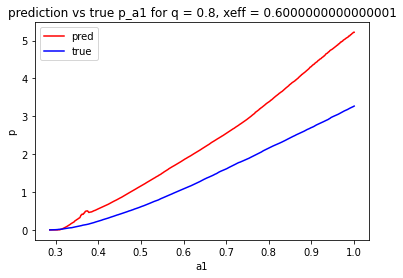

In [73]:
eva_model(model)